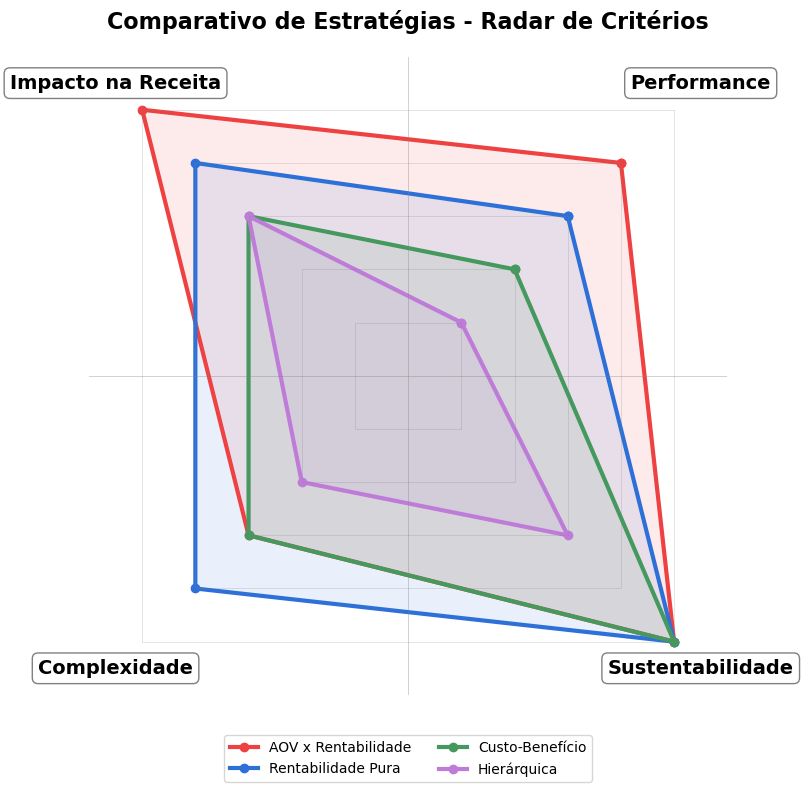

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Performance', 'Impacto na Receita', 'Complexidade', 'Sustentabilidade']
strategies = ['AOV x Rentabilidade', 'Rentabilidade Pura', 'Custo-Benefício', 'Hierárquica']

data = {
    'AOV x Rentabilidade': [4, 5, 3, 5],
    'Rentabilidade Pura': [3, 4, 4, 5],
    'Custo-Benefício': [2, 3, 3, 5],
    'Hierárquica': [1, 3, 2, 3],
}

num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#EE4141", "#2D71D8", "#45995E", "#BE7CD8"]


square_coords = [(1, 1), (-1, 1), (-1, -1), (1, -1), (1, 1)]

for idx, (strategy, values) in enumerate(data.items()):
    normalized_values = [v/5 for v in values] 
    coords_x = [coord[0] * val for coord, val in zip(square_coords[:-1], normalized_values)]
    coords_y = [coord[1] * val for coord, val in zip(square_coords[:-1], normalized_values)]
    coords_x.append(coords_x[0]) 
    coords_y.append(coords_y[0])
    
    ax.plot(coords_x, coords_y, color=colors[idx], linewidth=3, label=strategy, marker='o', markersize=6)
    ax.fill(coords_x, coords_y, color=colors[idx], alpha=0.1)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')

label_positions = [(1.1, 1.1), (-1.1, 1.1), (-1.1, -1.1), (1.1, -1.1)]
for i, label in enumerate(labels):
    ax.text(label_positions[i][0], label_positions[i][1], label, 
            fontsize=14, fontweight='bold', ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='gray'))

for i in range(1, 6):
    scale = i/5
    square_x = [scale, -scale, -scale, scale, scale]
    square_y = [scale, scale, -scale, -scale, scale]
    ax.plot(square_x, square_y, 'gray', alpha=0.3, linewidth=0.5)

ax.axhline(y=0, color='gray', linewidth=0.5, alpha=0.5)
ax.axvline(x=0, color='gray', linewidth=0.5, alpha=0.5)

ax.set_title('Comparativo de Estratégias - Radar de Critérios', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.10), ncol=2)
ax.axis('off')

plt.tight_layout()
plt.show()


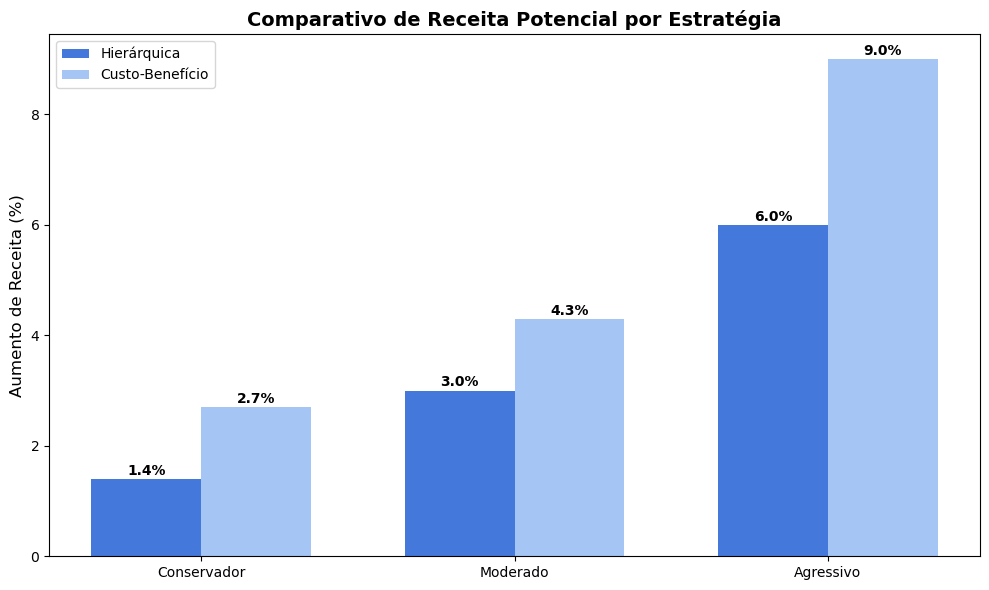

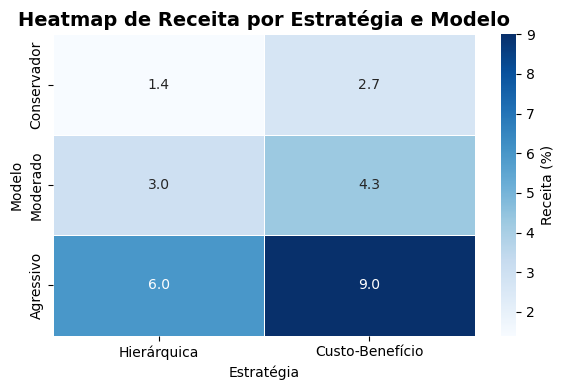

In [ ]:
import pandas as pd
import seaborn as sns

modelos = ['Conservador', 'Moderado', 'Agressivo']
hierarquica = [1.4, 3.0, 6.0]
custo_beneficio = [2.7, 4.3, 9.0]

df_barras = pd.DataFrame({
    'Modelo': modelos,
    'Hierárquica': hierarquica,
    'Custo-Benefício': custo_beneficio
})

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_barras))

bars1 = ax.bar([i - bar_width/2 for i in x], df_barras['Hierárquica'], 
               width=bar_width, label='Hierárquica', color='#4479DB')
bars2 = ax.bar([i + bar_width/2 for i in x], df_barras['Custo-Benefício'], 
               width=bar_width, label='Custo-Benefício', color='#A5C5F5')

ax.set_ylabel('Aumento de Receita (%)', fontsize=12)
ax.set_title('Comparativo de Receita Potencial por Estratégia', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

df_heatmap = pd.DataFrame({
    'Hierárquica': hierarquica,
    'Custo-Benefício': custo_beneficio
}, index=modelos)

plt.figure(figsize=(6, 4))
sns.heatmap(df_heatmap, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'Receita (%)'})
plt.title('Heatmap de Receita por Estratégia e Modelo', fontsize=14, fontweight='bold')
plt.xlabel('Estratégia')
plt.ylabel('Modelo')
plt.tight_layout()
plt.show()
